# from ML sharifi zarchi

- بردار نرمال صفحه 
یاداوری 

‌![alt text](https://img.tebyan.net/big/1395/11/20170129123410266_1.gif)

![alt text](https://img.tebyan.net/big/1395/11/20170129123410480_8.gif)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Part A: Linearly Separable Data


In [4]:
def generate_ab_class(n_points=100):
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(class_A) < n_points:
            class_A.append([x, y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()

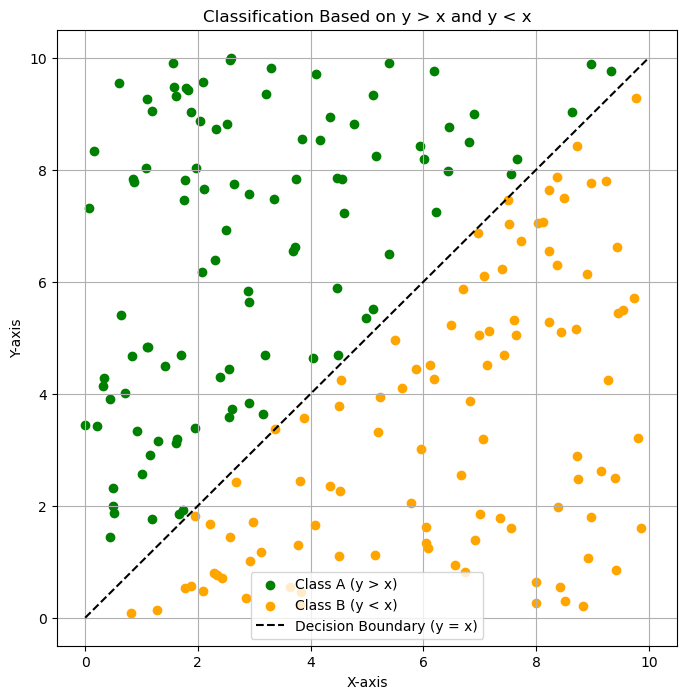

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A[:, 0], class_A[:, 1], color='green', label='Class A (y > x)')
plt.scatter(class_B[:, 0], class_B[:, 1], color='orange', label='Class B (y < x)')
plt.plot([0, 10], [0, 10], color='black', linestyle='--', label='Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification Based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = []  # storing the number of misclassifications in each epoch

    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.  Parameters:  
        X : array-like, shape = [n_samples, n_features]
            Training vectors.  
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_features = X.shape
        # starting weights and bias equal zeros
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for epoch in range(self.n_epochs):
            errors = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias  # w^T x + b
                y_pred = self._unit_step(linear_output)
                if y[idx] != y_pred: # misclassfied
                    update = self.learning_rate * y[idx]
                    self.weights += update * X[idx]
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)
            # if no errors, convergence achieved
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break

    def predict(self, X):
        """Predict class labels for samples in X. 

        Parameters: X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)
    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)

TypeError: Perceptron.predict() missing 2 required positional arguments: 'self' and 'X'